In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [4]:
data = pd.read_csv('NBA_player_of_the_week.csv')

In [5]:
data.head(15)


,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,NaN,"Mar 10, 1985",1980,6-4,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,NaN,"Mar 3, 1985",1982,6-3,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,NaN,"Feb 24, 1985",1981,6-6,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,NaN,"Feb 17, 1985",1979,6-9,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,NaN,"Feb 3, 1985",1982,6-7,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
Age                  1145 non-null int64
Conference           761 non-null object
Date                 1145 non-null object
Draft Year           1145 non-null int64
Height               1145 non-null object
Player               1145 non-null object
Position             1145 non-null object
Season               1145 non-null object
Season short         1145 non-null int64
Seasons in league    1145 non-null int64
Team                 1145 non-null object
Weight               1145 non-null object
Real_value           1145 non-null float64
dtypes: float64(1), int64(4), object(8)
memory usage: 116.4+ KB


In [7]:
data.describe()

,Age,Draft Year,Season short,Seasons in league,Real_value
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,26.772926,1997.244541,2004.211354,5.869869,0.667686
std,3.402354,9.381369,9.426976,3.271995,0.236163
min,19.000000,1969.000000,1985.000000,0.000000,0.500000
25%,24.000000,1990.000000,1997.000000,3.000000,0.500000
50%,26.000000,1998.000000,2006.000000,6.000000,0.500000
75%,29.000000,2004.000000,2012.000000,8.000000,1.000000
max,40.000000,2016.000000,2018.000000,17.000000,1.000000


In [8]:
data.columns


Index(['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player',
       'Position', 'Season', 'Season short', 'Seasons in league', 'Team',
       'Weight', 'Real_value'],
      dtype='object')

In [9]:
data.corr()


,Age,Draft Year,Season short,Seasons in league,Real_value
Age,1.000000,-0.347512,-0.029326,0.886507,0.086594
Draft Year,-0.347512,1.000000,0.938776,-0.140436,-0.808007
Season short,-0.029326,0.938776,1.000000,0.205049,-0.854013
Seasons in league,0.886507,-0.140436,0.205049,1.000000,-0.160651
Real_value,0.086594,-0.808007,-0.854013,-0.160651,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns  

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<Figure size 1800x1800 with 2 Axes>

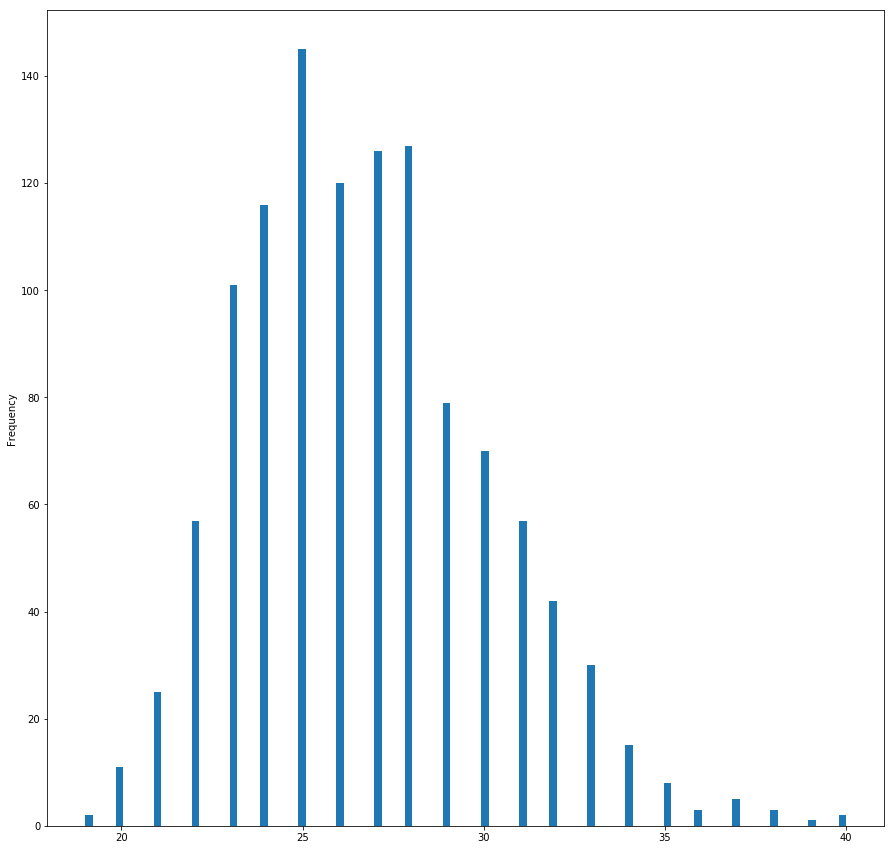

In [11]:
data.Age.plot(kind = 'hist',bins = 100,figsize = (15,15))
plt.show()

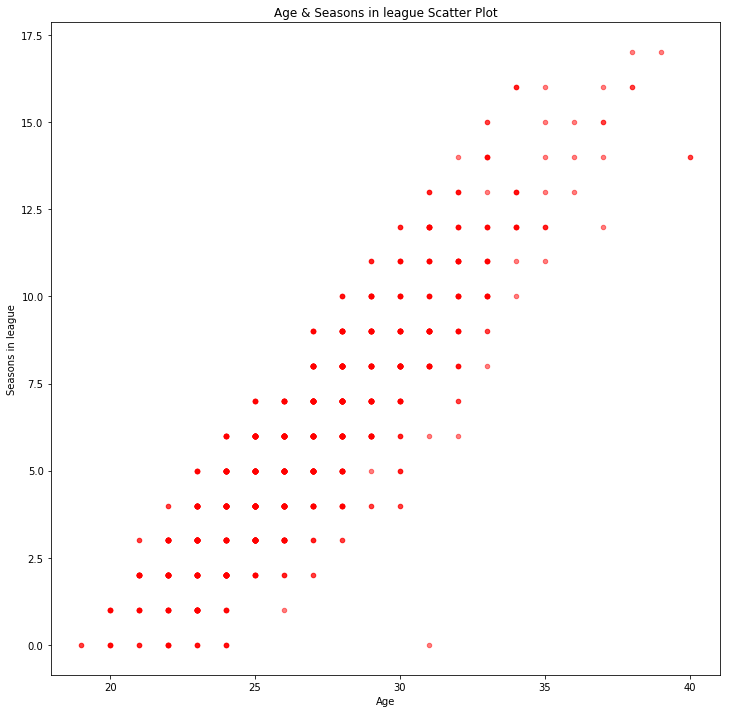

In [12]:
data.plot(kind='scatter', x='Age', y='Seasons in league',alpha = 0.5,color = 'red', figsize=(12,12))
plt.xlabel('Age')             
plt.ylabel('Seasons in league')
plt.title('Age & Seasons in league Scatter Plot')        
plt.show()

In [13]:
x = data['Age']>35    
data[x]
# We can see only the players older than 35 when he was chosen player of the week by using this filter.

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
46,37,NaN,"Apr 19, 1987",1972,6-6,Julius Erving,SF,1986-1987,1987,14,Philadelphia Sixers,200,1.0
299,36,NaN,"Nov 17, 1996",1983,6-7,Dale Ellis,GF,1996-1997,1997,13,Denver Nuggets,205,1.0
343,36,NaN,"Mar 6, 2000",1985,6-9,Karl Malone,PF,1999-2000,2000,14,Utah Jazz,265,1.0
382,37,NaN,"Nov 6, 2000",1985,6-9,Karl Malone,PF,2000-2001,2001,15,Utah Jazz,265,1.0
383,38,NaN,"Nov 6, 2000",1984,6-1,John Stockton,PG,2000-2001,2001,16,Utah Jazz,170,1.0
399,38,West,"Feb 17, 2002",1985,6-9,Karl Malone,PF,2001-2002,2002,16,Utah Jazz,265,0.5
440,40,East,"Mar 2, 2003",1984,6-6,Michael Jordan,SG,2002-2003,2003,14,Washington Wizards,215,0.5
455,40,East,"Jan 5, 2003",1984,6-6,Michael Jordan,SG,2002-2003,2003,14,Washington Wizards,215,0.5
511,37,East,"Nov 30, 2003",1991,7-2,Dikembe Mutombo,C,2003-2004,2004,12,New York Knicks,260,0.5


In [14]:
y = data['Team']=='Los Angeles Lakers'   
data[y]
# We can see the players from only Utah Jazz Lakers by using this filter.

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
8,25,NaN,"Feb 17, 1985",1979,6-9,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
28,26,NaN,"Mar 9, 1986",1979,6-9,Magic Johnson,PG,1985-1986,1986,6,Los Angeles Lakers,255,1.0
48,27,NaN,"Apr 5, 1987",1979,6-9,Magic Johnson,PG,1986-1987,1987,7,Los Angeles Lakers,255,1.0
50,27,NaN,"Mar 22, 1987",1979,6-9,Magic Johnson,PG,1986-1987,1987,7,Los Angeles Lakers,255,1.0
52,27,NaN,"Mar 8, 1987",1979,6-9,Magic Johnson,PG,1986-1987,1987,7,Los Angeles Lakers,255,1.0
55,27,NaN,"Feb 15, 1987",1979,6-9,Magic Johnson,PG,1986-1987,1987,7,Los Angeles Lakers,255,1.0
62,27,NaN,"Dec 21, 1986",1979,6-9,Magic Johnson,PG,1986-1987,1987,7,Los Angeles Lakers,255,1.0
83,26,NaN,"Jan 10, 1988",1983,6-3,Byron Scott,SG,1987-1988,1988,4,Los Angeles Lakers,195,1.0
87,28,NaN,"Dec 13, 1987",1979,6-9,Magic Johnson,PG,1987-1988,1988,8,Los Angeles Lakers,255,1.0


In [15]:
# We can also create new data_frames by using this data.
data_frame_specialities_of_players = data[['Player','Age','Weight','Height']]  
print(type(data_frame_specialities_of_players))
data_frame_specialities_of_players.head()

<class 'pandas.core.frame.DataFrame'>


,Player,Age,Weight,Height
0,Micheal Ray Richardson,29,189,6-5
1,Derek Smith,23,205,6-6
2,Calvin Natt,28,220,6-6
3,Kareem Abdul-Jabbar,37,225,7-2
4,Larry Bird,28,220,6-9


In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


from wordcloud import WordCloud
from pprint import pprint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import numpy as np

from nltk.corpus import stopwords

stopwords = stopwords.words('english')
stopwords.append("verse")
stopwords.append("chorus")
stopwords.append("choru")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

ModuleNotFoundError: No module named 'wordcloud'